# Welcome to Colab!

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving Personal_Budget.csv to Personal_Budget (1).csv


In [ ]:
df = pd.read_csv("Personal_Budget.csv")
df.head()

,date,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50


In [ ]:
df.tail()

,date,category,amount
4592,2025-03-09 18:16:33 +0000,Market,2.88
4593,2025-03-10 02:50:47 +0000,Transport,0.50
4594,2025-03-10 13:25:19 +0000,Transport,0.50
4595,2025-03-10 14:21:57 +0000,Market,7.50
4596,2025-03-11 02:42:35 +0000,Transport,0.50


In [ ]:
df.shape

(4597, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      4597 non-null   object 
 1   category  4597 non-null   object 
 2   amount    4597 non-null   float64
dtypes: float64(1), object(2)
memory usage: 107.9+ KB


In [ ]:
df.describe()

,amount
count,4597.000000
mean,15.591100
std,75.778464
min,0.050000
25%,4.000000
50%,7.100000
75%,11.500000
max,2500.000000


In [ ]:
df.isna().sum()

,0
date,0
category,0
amount,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df.head()

,date,category,amount
0,2022-07-06 05:57:10 +0000,14,5.50
1,2022-07-06 05:57:27 +0000,9,2.00
2,2022-07-06 05:58:12 +0000,2,30.10
3,2022-07-06 05:58:25 +0000,9,17.33
4,2022-07-06 05:59:00 +0000,14,5.50


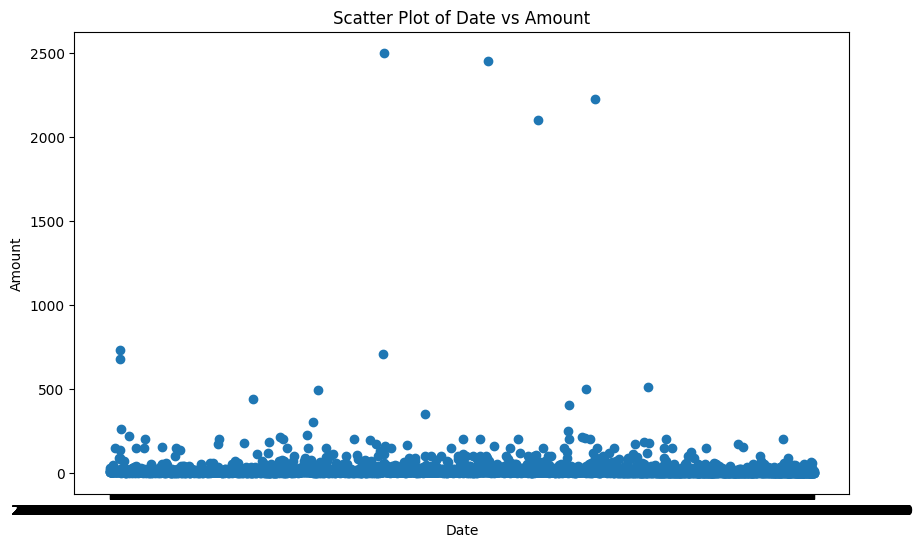

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['date'], df['amount'])
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Scatter Plot of Date vs Amount')
plt.show()

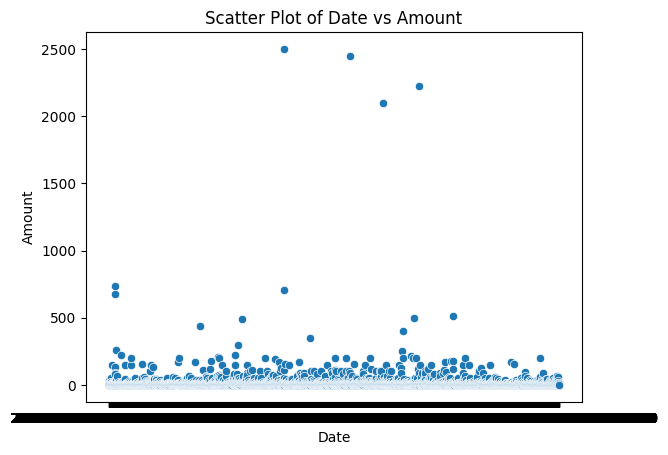

In [ ]:
import seaborn as sns
sns.scatterplot(x='date', y='amount', data=df)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Scatter Plot of Date vs Amount')
plt.show()

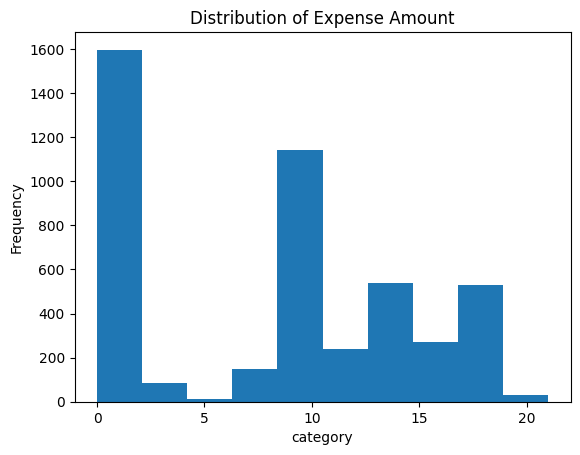

In [ ]:
plt.figure()
plt.hist(df['category'], bins=10)
plt.xlabel('category')
plt.ylabel('Frequency')
plt.title('Distribution of Expense Amount')
plt.show()

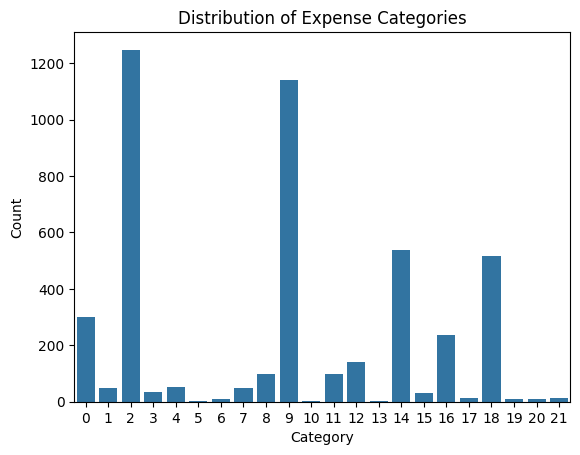

In [ ]:
plt.figure()
sns.countplot(x='category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Expense Categories')
plt.show()

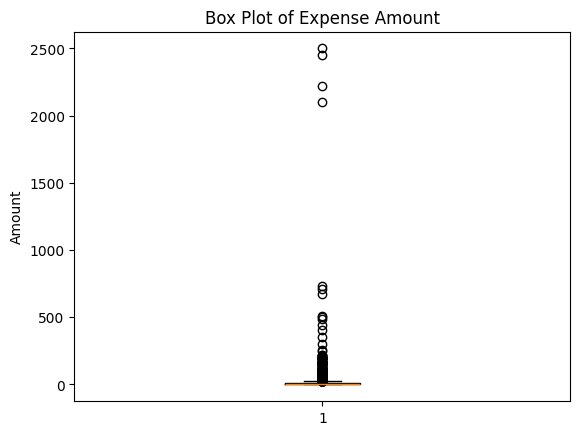

In [ ]:
plt.figure()
plt.boxplot(df['amount'])
plt.ylabel('Amount')
plt.title('Box Plot of Expense Amount')
plt.show()

<Figure size 1000x600 with 0 Axes>

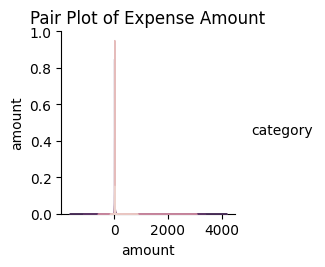

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(df, hue='category')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Pair Plot of Expense Amount')
plt.show()

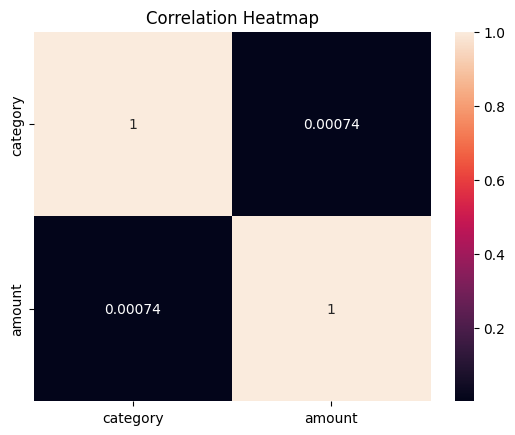

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]

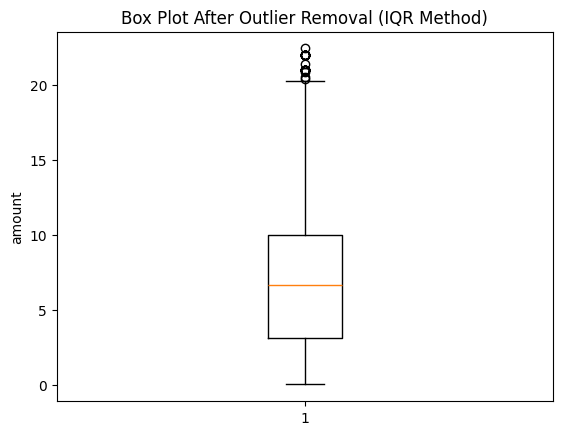

In [ ]:
plt.figure()
plt.boxplot(df['amount'])
plt.ylabel('amount')
plt.title('Box Plot After Outlier Removal (IQR Method)')
plt.show()

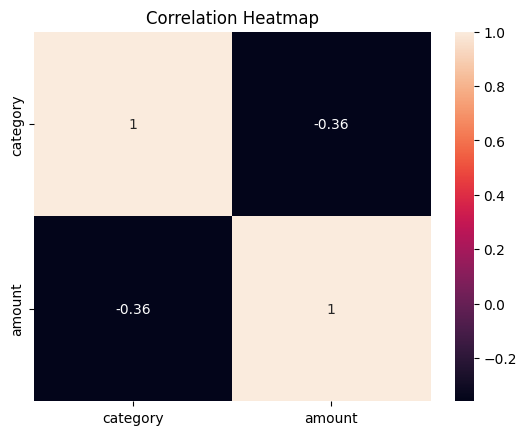

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

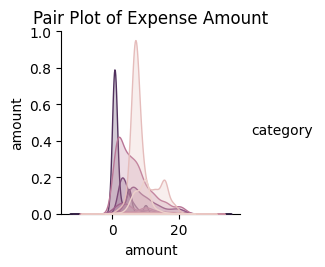

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(df, hue='category')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Pair Plot of Expense Amount')
plt.show()

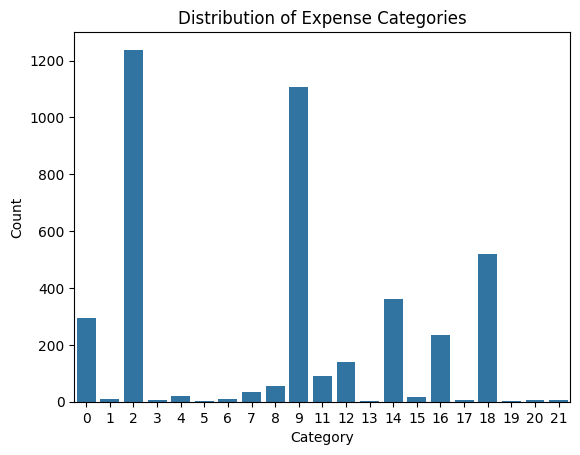

In [ ]:
plt.figure()
sns.countplot(x='category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Expense Categories')
plt.show()

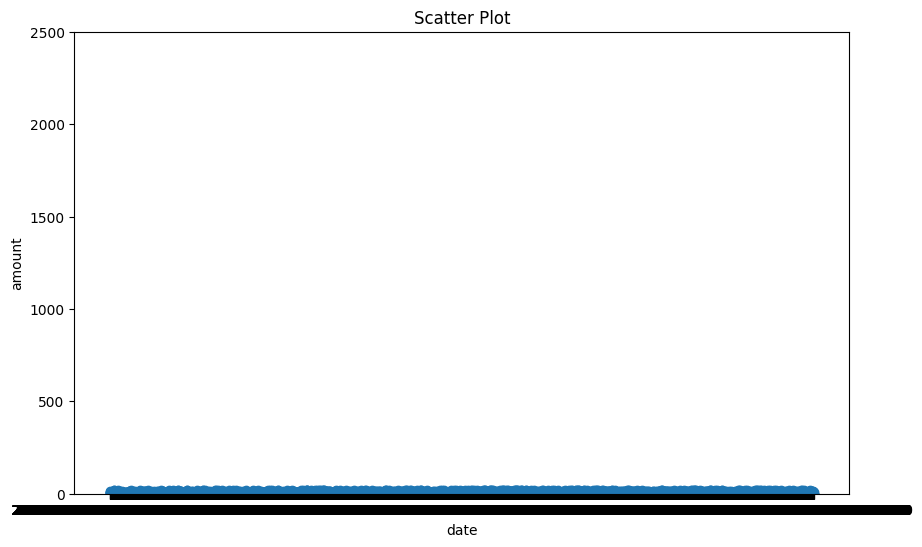

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x='date',y='amount',data=df)
plt.xlabel('date')
plt.ylabel('amount')
plt.title("Scatter Plot")
plt.ylim(0, 2500)
plt.show()

/tmp/ipython-input-888390788.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['date'].dt.to_period('M')


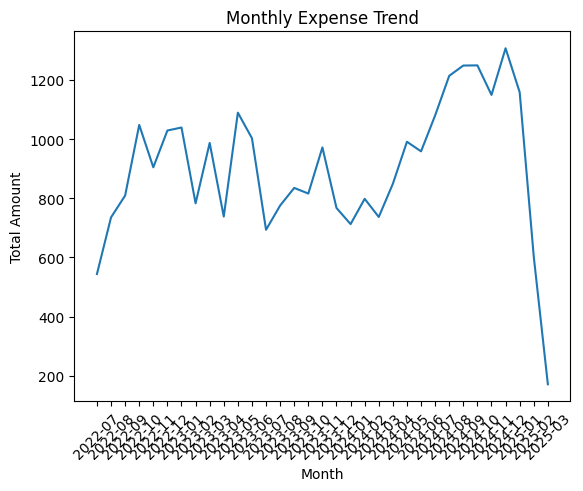

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
monthly_sum = df.groupby('month')['amount'].sum()

plt.figure()
plt.plot(monthly_sum.index.astype(str), monthly_sum.values)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Monthly Expense Trend')
plt.show()

In [ ]:
import pandas as pd
from io import BytesIO

# Re-read the original CSV data from the 'uploaded' dictionary
df = pd.read_csv(BytesIO(uploaded['Personal_Budget (1).csv']))

# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'], utc=True)

# Display the head to show the change
print("DataFrame after reverting 'date' column to datetime:")
display(df.head())
print("\nDataFrame info after reverting 'date' column to datetime:")
df.info()

DataFrame after reverting 'date' column to datetime:


,date,category,amount
0,2022-07-06 05:57:10+00:00,Restuarant,5.50
1,2022-07-06 05:57:27+00:00,Market,2.00
2,2022-07-06 05:58:12+00:00,Coffe,30.10
3,2022-07-06 05:58:25+00:00,Market,17.33
4,2022-07-06 05:59:00+00:00,Restuarant,5.50



DataFrame info after reverting 'date' column to datetime:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   date      4597 non-null   datetime64[ns, UTC]
 1   category  4597 non-null   object             
 2   amount    4597 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 107.9+ KB


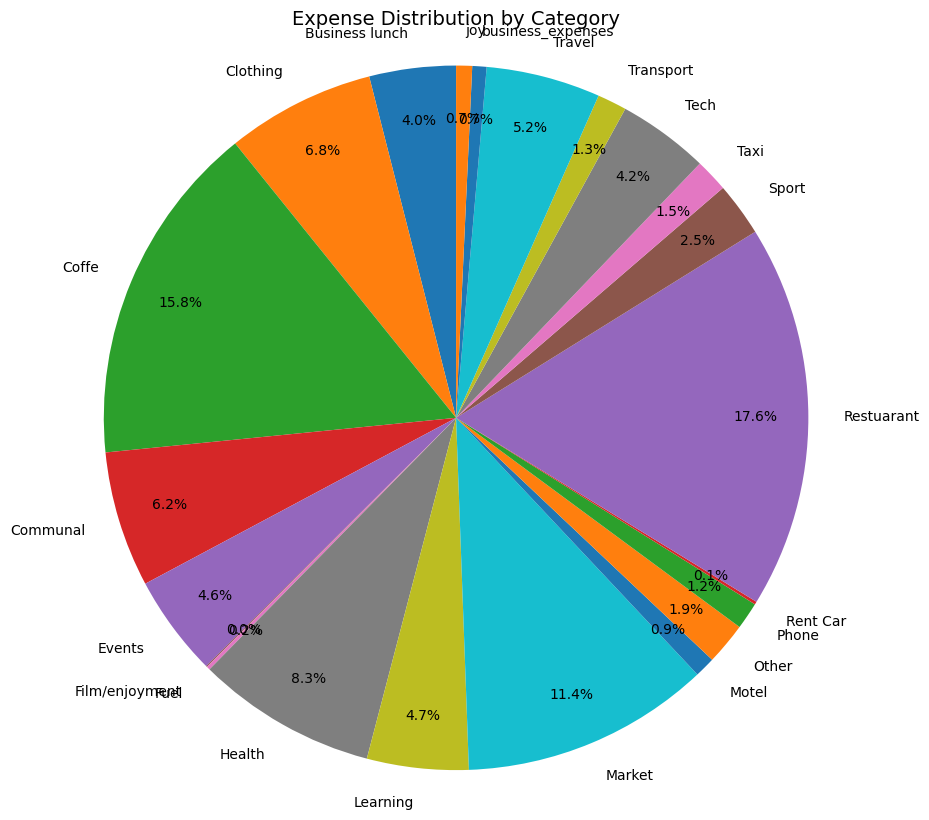

In [ ]:
plt.figure(figsize=(10, 10)) # Increased figure size for better visibility
# Calculate the total amount for each category
category_amounts = df.groupby('category')['amount'].sum()
# Create the pie chart
plt.pie(category_amounts, labels=category_amounts.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, pctdistance=0.85) # Increased font size and adjusted percentage label distance
plt.title('Expense Distribution by Category', fontsize=14) # Increased title font size
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()